In [13]:
import utils
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def region_growing(im: np.ndarray, seed_points: list, T: int) -> np.ndarray:
    """
    Region growing algorithm that segments an image into 1 or 0 (True or False).
    Uses a Moore neighborhood (8-connectedness) and pixel intensity threshold T.
    
    Args:
        im: np.ndarray of shape (H, W) in range [0, 255], dtype=np.uint8
        seed_points: list of [row, col] seed points. Seed points to start the region growing.
        T: Integer threshold for homogeneity criteria. Determines the allowed intensity difference.
    
    Returns:
        segmented: np.ndarray of shape (H, W), dtype=bool
                   Boolean mask where True indicates the segmented region.
    """
    # Get the dimensions of the image
    H, W = im.shape
    
    # Initialize an empty segmentation mask (all False initially)
    segmented = np.zeros((H, W), dtype=bool)
    
    # Initialize a visited array to keep track of which pixels have been checked
    visited = np.zeros((H, W), dtype=bool)
    
    # Convert image to float for accurate intensity difference calculations
    im = im.astype(float)
    
    # Define the Moore neighborhood (8-connectedness)
    # This defines the relative row and column offsets for the neighbors
    neighbors = [(-1, -1), (-1, 0), (-1, 1),  # Top-left, Top, Top-right
                 (0, -1),         (0, 1),    # Left, Right
                 (1, -1), (1, 0), (1, 1)]    # Bottom-left, Bottom, Bottom-right
    
    # Iterate over each seed point provided as input
    for seed in seed_points:
        # Initialize the queue with the current seed point
        # A queue is used to manage the candidate pixels for growing the region
        queue = np.array([seed])
        
        # Mark the seed point as visited
        visited[seed[0], seed[1]] = True
        
        # While there are pixels to process in the queue
        while queue.size > 0:
            # Extract the first pixel from the queue (FIFO behavior)
            current_point = queue[0]
            
            # Remove the processed pixel from the queue
            queue = np.delete(queue, 0, axis=0)
            
            # Get the row and column indices of the current pixel
            row, col = current_point
            
            # Mark the current pixel as part of the segmented region
            segmented[row, col] = True
            
            # Check all 8 neighbors of the current pixel
            for dr, dc in neighbors:
                # Compute the neighbor's row and column indices
                nr, nc = row + dr, col + dc
                
                # Check if the neighbor is within the image boundaries
                if 0 <= nr < H and 0 <= nc < W:
                    # If the neighbor hasn't been visited yet
                    if not visited[nr, nc]:
                        # Mark the neighbor as visited
                        visited[nr, nc] = True
                        
                        # Check if the neighbor satisfies the homogeneity criterion
                        # The absolute intensity difference between the neighbor and seed
                        # must be less than or equal to the threshold T
                        if abs(im[nr, nc] - im[seed[0], seed[1]]) <= T:
                            # Add the neighbor to the queue for further processing
                            queue = np.append(queue, [[nr, nc]], axis=0)
    
    # Return the final segmentation mask
    return segmented


Reading image: images\defective-weld.png
Saving image to: image_processed\defective-weld-segmented.png


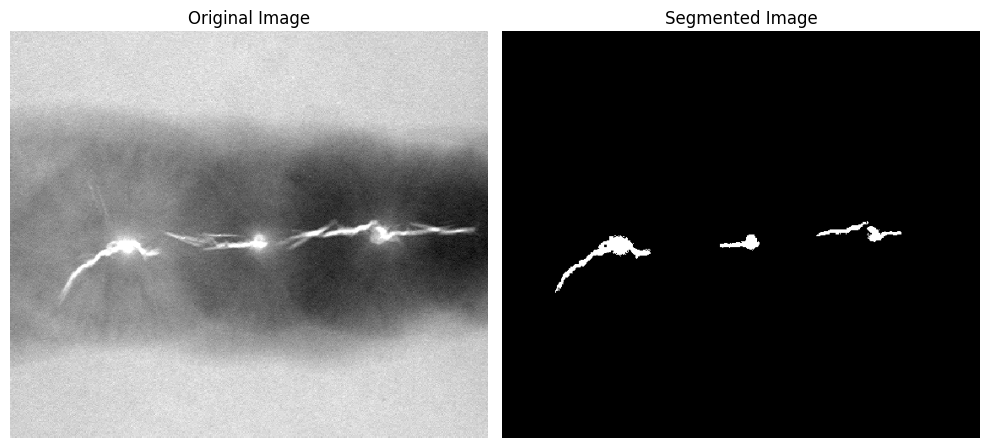

In [15]:
if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("defective-weld.png")

    seed_points = [ # (row, column)
        [254, 138], # Seed point 1
        [253, 296], # Seed point 2
        [233, 436], # Seed point 3
        [232, 417], # Seed point 4
    ]
    intensity_threshold = 50
    segmented_image = region_growing(im, seed_points, intensity_threshold)

    assert im.shape == segmented_image.shape, "Expected image shape ({}) to be same as thresholded image shape ({})".format(
        im.shape, segmented_image.shape)
    assert segmented_image.dtype == bool, "Expected thresholded image dtype to be bool. Was: {}".format(
            segmented_image.dtype)

    segmented_image = utils.to_uint8(segmented_image)
    utils.save_im("defective-weld-segmented.png", segmented_image)

    # Display Original and Segmented Images
    plt.figure(figsize=(10, 5))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(im, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    # Segmented Image
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap="gray")
    plt.title("Segmented Image")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
